<a href="https://colab.research.google.com/github/Avinash505/AIandMachinlearning/blob/main/Bike_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# => Bike Price Prediction using Linear Regression

# import Librares

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

# import CSV as DataFrame

In [ ]:
df = pd.read_csv(r'https://github.com/YBI-Foundation/Dataset/raw/main/Bike%20Prices.csv')

# Get the First Five Rows of DataFrame

In [ ]:
df.head()


,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


# Get  Information of DataFrame 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  626 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


# Get Missing Values Drop 

In [ ]:
df = df.dropna()

# Get Summary Statistics

In [ ]:
df.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,626.000000,626.000000,626.000000,6.260000e+02
mean,59445.164537,2014.800319,32671.576677,8.795871e+04
std,59904.350888,3.018885,45479.661039,7.749659e+04
min,6000.000000,2001.000000,380.000000,3.049000e+04
25%,30000.000000,2013.000000,13031.250000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,65000.000000,2017.000000,40000.000000,8.703150e+04
max,760000.000000,2020.000000,585659.000000,1.278000e+06


# Get Categories and Counts of Categorical Variables

In [ ]:
df[['Brand']].value_counts()

Brand   
Honda       170
Bajaj       143
Hero        108
Yamaha       94
Royal        40
TVS          23
Suzuki       18
KTM           6
Mahindra      6
Kawasaki      4
UM            3
Activa        3
Harley        2
Vespa         2
BMW           1
Hyosung       1
Benelli       1
Yo            1
dtype: int64

In [ ]:
df[['Model']].value_counts()

Model                                     
Honda Activa [2000-2015]                      23
Honda CB Hornet 160R                          22
Bajaj Pulsar 180                              20
Yamaha FZ S V 2.0                             16
Bajaj Discover 125                            16
                                              ..
Royal Enfield Thunderbird 500                  1
Royal Enfield Continental GT [2013 - 2018]     1
Royal Enfield Classic Stealth Black            1
Royal Enfield Classic Squadron Blue            1
Yo Style                                       1
Length: 183, dtype: int64

In [ ]:
df[['Seller_Type']].value_counts()

Seller_Type
Individual     623
Dealer           3
dtype: int64

In [ ]:
df[['Owner']].value_counts()

Owner    
1st owner    556
2nd owner     66
3rd owner      3
4th owner      1
dtype: int64

# Get Column Names


In [ ]:
df.columns

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price'],
      dtype='object')

# Get Shape of DataFrame


In [ ]:
df.shape

(626, 8)

# Get Encoding of Categorical Features


In [ ]:
df.replace({'Seller_Type':{'Individual':0,'Dealer':1}},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
df.replace({'Owner':{'1st owner':0, '2nd owner':1,'3rd owner':2,'4th owner':3}},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


# Define y(dependent or label or target varaible) and X(independent or features or attribute Variable)



In [ ]:
y=df['Selling_Price']


In [ ]:
y.shape

(626,)

In [ ]:
y

0       30000
1       18000
2       20000
3       25000
4       24999
        ...  
621    330000
622    300000
623    425000
624    760000
625    750000
Name: Selling_Price, Length: 626, dtype: int64

In [ ]:
X=df[['Year','Seller_Type', 'Owner', 'KM_Driven', 'Ex_Showroom_Price']]

In [ ]:
X.shape

(626, 5)

In [ ]:
X

,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,2017,0,0,8000,30490.0
1,2017,0,0,35000,32000.0
2,2011,0,0,10000,37675.0
3,2010,0,0,43000,42859.0
4,2012,0,1,35000,42859.0
...,...,...,...,...,...
621,2014,0,3,6500,534000.0
622,2011,0,0,12000,589000.0
623,2017,0,1,13600,599000.0
624,2019,0,0,2800,752020.0


# Get Train Test Split



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size =0.3, random_state =12529)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((438, 5), (188, 5), (438,), (188,))

# Get Model Train


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

# Get Model Prediction



In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred.shape

(188,)

In [ ]:
y_pred

array([ 52652.60893422,  39486.41676174, 196562.43198625,  55580.50406346,
        26140.7294817 ,  94608.16940208, 119187.31851386,  68882.3690645 ,
        33660.46971131,  46944.42315337,  53461.39448308,  11010.80661868,
        33332.52261297,  99136.85017253,  53520.69363007,  77889.92667438,
        45898.51705698,  51568.3299629 ,  23936.19734581,  53169.07821732,
        93240.71089046,   -982.05901745,  72782.26710892,  61648.18639175,
        60975.53326568,  29005.69236305,  52733.45578055,  76744.27220676,
        25899.12686651,  38977.3804656 , 136552.24672472,  43207.37077002,
        59999.13518358, 178300.52079438,  56538.55902122,  21881.41938333,
        39242.90242196,  32072.27344395,  54250.50343725,  39760.72648086,
        58983.84447845,  30360.33221383,  53733.14061814,  39812.75115879,
       135490.92768479,  44412.40326896,   7898.88343967,  52017.36847523,
        42026.43374389, 104169.26650705,  60024.05156225, 101703.69488341,
        73823.40634497,  

# Get Model Evaluation



In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
mean_squared_error(y_test,y_pred)

280339916.89860415

In [ ]:
mean_absolute_error(y_test,y_pred)

11298.505848535633

In [ ]:
r2_score(y_test, y_pred)

0.8473238209281027

# Get Visualization of Actual Vs Predicted Results



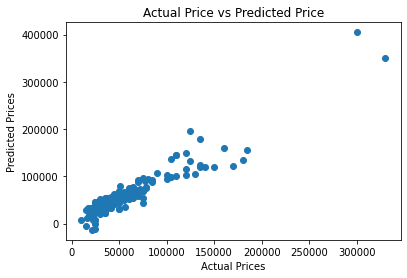

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price vs Predicted Price')
plt.show()


# Get Future Predictions



In [ ]:
df_new = df.sample(1)


In [ ]:
df_new

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
8,Bajaj,Bajaj Discover 100,28000,2015,0,1,52000,42859.0


In [ ]:
df_new.shape

(1, 8)

In [ ]:
X_new = df_new.drop(['Brand', 'Model', 'Selling_Price'],axis = 1)

In [ ]:
y_pred_new = lr.predict(X_new)

In [ ]:
y_pred_new


array([19768.4541432])

# THAT'S IT